In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brand-laptops-dataset/laptops.csv


In [2]:
Laptops = pd.read_csv('/kaggle/input/brand-laptops-dataset/laptops.csv')
Laptops

,index,brand,Model,Price,Rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,...,secondary_storage_type,secondary_storage_capacity,gpu_brand,gpu_type,is_touch_screen,display_size,resolution_width,resolution_height,OS,year_of_warranty
0,1,tecno,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,23990,63,intel,core i3,2,4,8,...,No secondary storage,0,intel,integrated,False,15.6,1920,1080,windows,1
1,2,tecno,Tecno Megabook T1 Laptop (11th Gen Core i7/ 16...,35990,67,intel,core i7,4,8,16,...,No secondary storage,0,intel,integrated,False,15.6,1920,1080,windows,1
2,3,hp,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,51100,73,amd,ryzen 5,6,12,8,...,No secondary storage,0,amd,dedicated,False,15.6,1920,1080,windows,1
3,4,acer,Acer Extensa EX214-53 Laptop (12th Gen Core i5...,39990,62,intel,core i5,12,16,8,...,No secondary storage,0,intel,integrated,False,14.0,1920,1080,windows,1
4,5,lenovo,Lenovo V15 82KDA01BIH Laptop (AMD Ryzen 3 5300...,28580,62,amd,ryzen 3,4,8,8,...,No secondary storage,0,amd,integrated,False,15.6,1920,1080,windows,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,998,asus,Asus Vivobook Pro 15 M6500QC-HN542WS Laptop (R...,65990,68,amd,ryzen 5,6,12,16,...,No secondary storage,0,nvidia,dedicated,False,15.6,1920,1080,windows,1
987,999,msi,MSI Thin GF63 12VE-070IN Gaming Laptop (12th G...,91990,73,intel,core i7,10,16,16,...,No secondary storage,0,nvidia,dedicated,False,15.6,1920,1080,windows,2
988,1000,asus,Asus Vivobook Go 15 2023 E1504FA-NJ522WS Lapto...,44990,59,amd,ryzen 5,4,8,8,...,No secondary storage,0,amd,integrated,False,15.6,1920,1080,windows,1
989,1001,asus,Asus Zenbook 14 2023 UM3402YA-KP541WS Laptop (...,67990,68,amd,ryzen 5,6,12,16,...,No secondary storage,0,amd,integrated,False,14.0,2560,1600,windows,1


In [4]:
Laptops.columns

Index(['index', 'brand', 'Model', 'Price', 'Rating', 'processor_brand',
       'processor_tier', 'num_cores', 'num_threads', 'ram_memory',
       'primary_storage_type', 'primary_storage_capacity',
       'secondary_storage_type', 'secondary_storage_capacity', 'gpu_brand',
       'gpu_type', 'is_touch_screen', 'display_size', 'resolution_width',
       'resolution_height', 'OS', 'year_of_warranty'],
      dtype='object')

In [6]:
Laptops.columns.isnull().sum()

0

In [12]:
integer_attributes = Laptops.select_dtypes(include=['integer','float'])
integer_attributes

,index,Price,Rating,num_cores,num_threads,ram_memory,primary_storage_capacity,secondary_storage_capacity,display_size,resolution_width,resolution_height
0,1,23990,63,2,4,8,512,0,15.6,1920,1080
1,2,35990,67,4,8,16,1024,0,15.6,1920,1080
2,3,51100,73,6,12,8,512,0,15.6,1920,1080
3,4,39990,62,12,16,8,512,0,14.0,1920,1080
4,5,28580,62,4,8,8,512,0,15.6,1920,1080
...,...,...,...,...,...,...,...,...,...,...,...
986,998,65990,68,6,12,16,512,0,15.6,1920,1080
987,999,91990,73,10,16,16,512,0,15.6,1920,1080
988,1000,44990,59,4,8,8,512,0,15.6,1920,1080
989,1001,67990,68,6,12,16,512,0,14.0,2560,1600


<Axes: xlabel='Price', ylabel='Rating'>

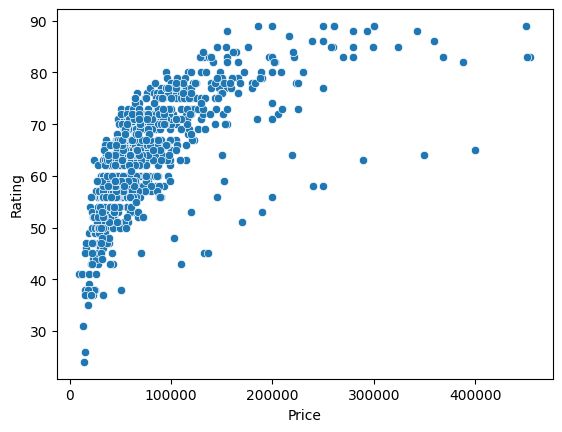

In [13]:
import seaborn as sns
sns.scatterplot(data=integer_attributes,x='Price', y='Rating')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


AttributeError: 'JointGrid' object has no attribute 'annotate'

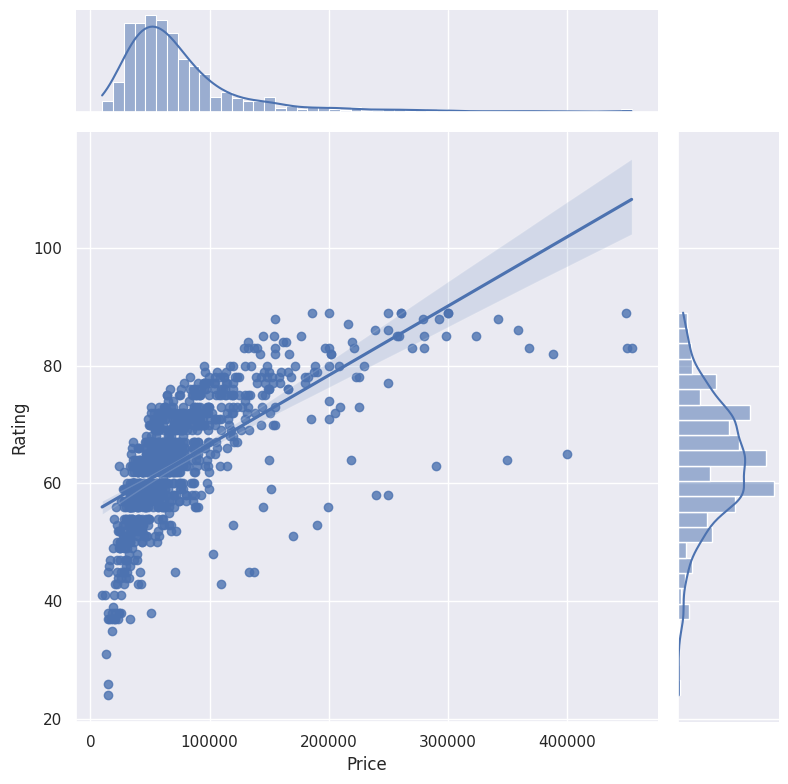

In [16]:
#sns.set(style="darkgrid",color_codes=True)
j=sns.jointplot(x='Price',y='Rating',data=integer_attributes,kind='reg',height=8)
j.annotate(stats.pearsonr)
plt.show()

In [28]:
integer_attributes.dtypes

index                           int64
Price                           int64
Rating                          int64
num_cores                       int64
num_threads                     int64
ram_memory                      int64
primary_storage_capacity        int64
secondary_storage_capacity      int64
display_size                  float64
resolution_width                int64
resolution_height               int64
dtype: object

In [31]:
print('success')

success
